## GANs

- Generative Adversarial Networks refer to a family of generative models that seek to discover the underlying distribution behind a certain data generating process. This distribution is discovered through an adversarial competition between a generator and a discriminator.

    - Discriminator: Tries to distinguish between real and fake samples.
    - Generator: Tries to confuse the discriminator by producing data that are as realistic and compelling as possible

### The Discriminator

The goal of the discriminator is to correctly label generated images as false and empirical data points as true. Therefore, we might consider the following to be the loss function of the discriminator:

$$ L_D=Error(D(x),1)+Error(D(G(z)),0)$$

### The Generator

We can go ahead and do the same for the generator. The goal of the generator is to confuse the discriminator as much as possible such that it mislabels generated images as being true.

$$ L_G=Error(D(G(z)),1)$$

In the case of the generator, it should strive to minimize the difference between 1, the label for true data, and the discriminator’s evaluation of the generated fake data.


### Binary Cross Entropy

$$ BCE(y,\hat{y}) = - \sum_{i=1}^{n} y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)$$

Applying BCE to the discriminator and generator loss functions, we get the following:

$$ L_D = - \sum_{i=1}^{n} log(D(x_i)) + log(1-D(G(z_i)))$$
$$ L_G = - \sum_{i=1}^{n} log(D(G(z_i)))$$


### Mode Collapse

Usually, we would want our GAN to produce a range of outputs. We would expect, for example, another face for every random input to the face generator that we design.     

Instead, through subsequent training, the network learns to model a particular distribution of data, which gives us a monotonous output which is illustrated below.     

![title](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/GAN-face-generator.png?ssl=1)

What causes mode collapse in GAN?

- Inability to find convergence for networks.
- The generator can find a certain type of data that can easily fool the discriminator. It’ll, again and again, generate the same data under the assumption that the goal is achieved. The entire system can over-optimize to that single type of output.

In [18]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 20
batch_size = 64
lr = 0.0002
print_interval = 400
show_interval = num_epochs // 5

In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])

dataset = datasets.MNIST(root="/projectnb/ds598/admin/xthomas/sp2024_notebooks/discussion/tmp", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [21]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
)


In [22]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
)


* Notice that we have different optimizers for the discriminator and the generator. This is expected, since we are going to be training two different networks in a different manner.

In [23]:
D = D.to(device)
G = G.to(device)
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=lr)
g_optimizer = torch.optim.Adam(G.parameters(), lr=lr)
total_step = len(data_loader)


In [24]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

Epoch [1/20], Step [400/937], d_loss: 0.0333, g_loss: 5.8773, D(x): 0.99, D(G(z)): 0.02
Epoch [1/20], Step [800/937], d_loss: 0.0213, g_loss: 5.9799, D(x): 1.00, D(G(z)): 0.02
Epoch [2/20], Step [400/937], d_loss: 0.2780, g_loss: 3.8854, D(x): 0.85, D(G(z)): 0.05
Epoch [2/20], Step [800/937], d_loss: 0.3006, g_loss: 2.6522, D(x): 0.90, D(G(z)): 0.13
Epoch [3/20], Step [400/937], d_loss: 0.6517, g_loss: 1.7808, D(x): 0.87, D(G(z)): 0.30
Epoch [3/20], Step [800/937], d_loss: 0.7751, g_loss: 2.8995, D(x): 0.81, D(G(z)): 0.32
Epoch [4/20], Step [400/937], d_loss: 0.8805, g_loss: 1.8007, D(x): 0.75, D(G(z)): 0.33
Epoch [4/20], Step [800/937], d_loss: 0.5741, g_loss: 1.8752, D(x): 0.76, D(G(z)): 0.19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


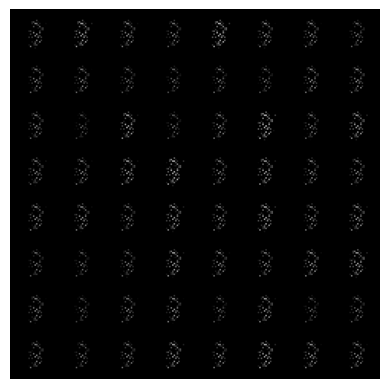

Epoch [5/20], Step [400/937], d_loss: 0.1741, g_loss: 3.5994, D(x): 0.96, D(G(z)): 0.10
Epoch [5/20], Step [800/937], d_loss: 0.1094, g_loss: 4.1838, D(x): 0.94, D(G(z)): 0.03
Epoch [6/20], Step [400/937], d_loss: 0.0718, g_loss: 5.4367, D(x): 0.98, D(G(z)): 0.05
Epoch [6/20], Step [800/937], d_loss: 0.2440, g_loss: 2.7886, D(x): 0.94, D(G(z)): 0.11
Epoch [7/20], Step [400/937], d_loss: 0.2137, g_loss: 4.2538, D(x): 0.96, D(G(z)): 0.07
Epoch [7/20], Step [800/937], d_loss: 0.2056, g_loss: 5.2787, D(x): 0.96, D(G(z)): 0.04
Epoch [8/20], Step [400/937], d_loss: 0.0473, g_loss: 6.0001, D(x): 0.98, D(G(z)): 0.03
Epoch [8/20], Step [800/937], d_loss: 0.2081, g_loss: 3.8254, D(x): 0.94, D(G(z)): 0.03


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


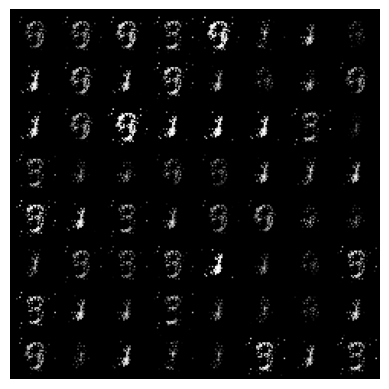

Epoch [9/20], Step [400/937], d_loss: 0.3839, g_loss: 5.0545, D(x): 0.94, D(G(z)): 0.15
Epoch [9/20], Step [800/937], d_loss: 0.5128, g_loss: 4.6744, D(x): 0.86, D(G(z)): 0.14
Epoch [10/20], Step [400/937], d_loss: 0.1404, g_loss: 6.4094, D(x): 0.94, D(G(z)): 0.02
Epoch [10/20], Step [800/937], d_loss: 0.3553, g_loss: 5.8194, D(x): 0.94, D(G(z)): 0.14
Epoch [11/20], Step [400/937], d_loss: 0.2321, g_loss: 4.2904, D(x): 0.94, D(G(z)): 0.05
Epoch [11/20], Step [800/937], d_loss: 0.2681, g_loss: 3.5910, D(x): 0.91, D(G(z)): 0.05
Epoch [12/20], Step [400/937], d_loss: 0.4164, g_loss: 3.4887, D(x): 0.85, D(G(z)): 0.05
Epoch [12/20], Step [800/937], d_loss: 0.0748, g_loss: 5.2332, D(x): 0.97, D(G(z)): 0.03


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


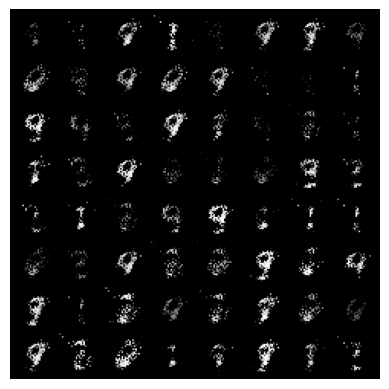

Epoch [13/20], Step [400/937], d_loss: 0.2717, g_loss: 2.7650, D(x): 0.88, D(G(z)): 0.03
Epoch [13/20], Step [800/937], d_loss: 0.1770, g_loss: 3.1279, D(x): 0.97, D(G(z)): 0.12
Epoch [14/20], Step [400/937], d_loss: 0.1817, g_loss: 3.7568, D(x): 0.93, D(G(z)): 0.06
Epoch [14/20], Step [800/937], d_loss: 0.1414, g_loss: 3.9277, D(x): 0.96, D(G(z)): 0.06
Epoch [15/20], Step [400/937], d_loss: 0.2758, g_loss: 5.6873, D(x): 0.91, D(G(z)): 0.05
Epoch [15/20], Step [800/937], d_loss: 0.1609, g_loss: 4.9440, D(x): 0.97, D(G(z)): 0.09
Epoch [16/20], Step [400/937], d_loss: 0.3040, g_loss: 3.6691, D(x): 0.91, D(G(z)): 0.08
Epoch [16/20], Step [800/937], d_loss: 0.3988, g_loss: 3.6384, D(x): 0.91, D(G(z)): 0.16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


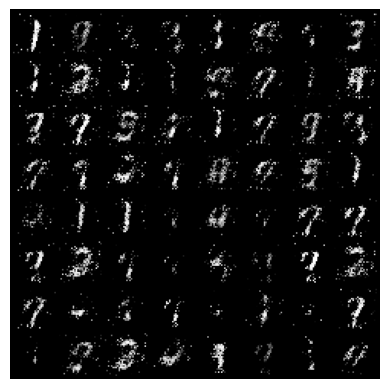

Epoch [17/20], Step [400/937], d_loss: 0.3124, g_loss: 4.0447, D(x): 0.95, D(G(z)): 0.16
Epoch [17/20], Step [800/937], d_loss: 0.2640, g_loss: 4.9274, D(x): 0.91, D(G(z)): 0.06
Epoch [18/20], Step [400/937], d_loss: 0.3202, g_loss: 4.3456, D(x): 0.90, D(G(z)): 0.07
Epoch [18/20], Step [800/937], d_loss: 0.2003, g_loss: 6.1920, D(x): 0.93, D(G(z)): 0.05
Epoch [19/20], Step [400/937], d_loss: 0.3835, g_loss: 3.7327, D(x): 0.86, D(G(z)): 0.09
Epoch [19/20], Step [800/937], d_loss: 0.3741, g_loss: 3.0836, D(x): 0.90, D(G(z)): 0.11
Epoch [20/20], Step [400/937], d_loss: 0.2996, g_loss: 3.2569, D(x): 0.90, D(G(z)): 0.09
Epoch [20/20], Step [800/937], d_loss: 0.2744, g_loss: 4.3666, D(x): 0.88, D(G(z)): 0.04


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


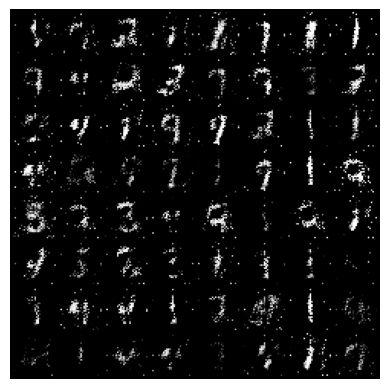

In [25]:
import os
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image

# Create a directory to save the generated images
image_dir = '/projectnb/ds598/admin/xthomas/sp2024_notebooks/discussion/disc9/generated_images'
os.makedirs(image_dir, exist_ok=True)

real_labels = torch.ones(batch_size, 1).to(device)
fake_labels = torch.zeros(batch_size, 1).to(device)

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # train discriminator
        # real images
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs.mean().item()
        
        # fake images
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs.mean().item()
        
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # train generator
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        g_loss = criterion(outputs, real_labels)
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i + 1) % print_interval == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], "
                f"Step [{i+1}/{total_step}], "
                f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, "
                f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}"
            )

            with torch.no_grad():
                z = torch.randn(batch_size, latent_size).to(device)
                fake_images = G(z).reshape(batch_size, 1, 28, 28).detach().cpu()
                img_grid = make_grid(fake_images, nrow=10, normalize=True)
                save_image_path = os.path.join(image_dir, f'epoch_{epoch+1:03d}_step_{i+1:05d}.png')
                save_img = img_grid.permute(1, 2, 0).numpy()
                plt.imsave(save_image_path, save_img)

    if (epoch + 1) % show_interval == 0:
        fake_images = fake_images.reshape(batch_size, 1, 28, 28).detach()
        plt.imshow(make_grid(fake_images).permute(1, 2, 0))
        plt.axis("off")
        plt.show()


    # if (epoch + 1) % show_interval == 0:
    #         with torch.no_grad():
    #             z = torch.randn(batch_size, latent_size).to(device)
    #             fake_images = G(z).reshape(batch_size, 1, 28, 28).detach().cpu()
    #             img_grid = make_grid(fake_images, nrow=10, normalize=True)
    #             save_image_path = os.path.join(image_dir, f'epoch_{epoch+1:03d}_step_{i+1:05d}.png')
    #             save_img = img_grid.permute(1, 2, 0).numpy()
    #             plt.imsave(save_image_path, save_img)

In [27]:
from PIL import Image

# List of generated images
image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])

# Create a GIF
images = [Image.open(image) for image in image_files]
gif_path = '/projectnb/ds598/admin/xthomas/sp2024_notebooks/discussion/disc9/gan_training.gif'
images[0].save(
    gif_path,
    save_all=True,
    append_images=images[1:],
    duration=400,  # Duration between frames in milliseconds
    loop=0  # Loop count, 0 for infinite
)

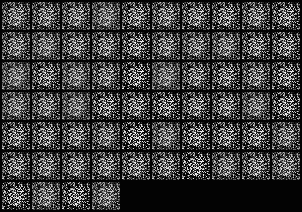

In [28]:
from IPython.display import Image as IPythonImage
IPythonImage(filename=gif_path)

#### ref: https://jaketae.github.io/study/pytorch-gan/